In [182]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [183]:
#dateParse = lambda x: pd.datetime.strptime(x,'%m%d%y')

rawData = pd.read_csv("ecommerse.csv",encoding = 'unicode_escape')
df = pd.DataFrame(rawData) 

In [184]:
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [185]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [186]:
#df.CustomerID = df.CustomerID.fillna(1)
df = df.dropna()
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [187]:
#df.InvoiceDate = pd.to_datetime(df.InvoiceDate)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null object
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [188]:
df.duplicated().sum()


5225

In [189]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      401604 non-null object
StockCode      401604 non-null object
Description    401604 non-null object
Quantity       401604 non-null int64
InvoiceDate    401604 non-null object
UnitPrice      401604 non-null float64
CustomerID     401604 non-null float64
Country        401604 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [190]:
temp = df_initial[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()
print("Top 3 countries that the customes reside:")
print(countries[:3])

Top 3 countries that the customes reside:
United Kingdom    19857
Germany             603
France              458
Name: Country, dtype: int64


In [191]:
dfGroup = df.groupby(["Description"])["Quantity"].max().head(10)
dfGroup = dfGroup.reset_index()

In [192]:
dfGroupSort = dfGroup.sort_values(by="Quantity",ascending=False)
dfGroupSort

,Description,Quantity
8,SET 2 TEA TOWELS I LOVE LONDON,600
1,50'S CHRISTMAS GIFT BAG LARGE,400
2,DOLLY GIRL BEAKER,400
7,RED SPOT GIFT BAG LARGE,400
3,I LOVE LONDON MINI BACKPACK,50
9,SPACEBOY BABY GIFT SET,36
6,OVAL WALL MIRROR DIAMANTE,24
0,4 PURPLE FLOCK DINNER CANDLES,12
5,NINE DRAWER OFFICE TIDY,6
4,I LOVE LONDON MINI RUCKSACK,1


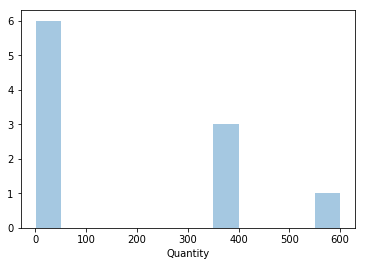

In [193]:
plt.figure()
sns.distplot(dfGroupSort.Quantity,bins=12,kde=False)

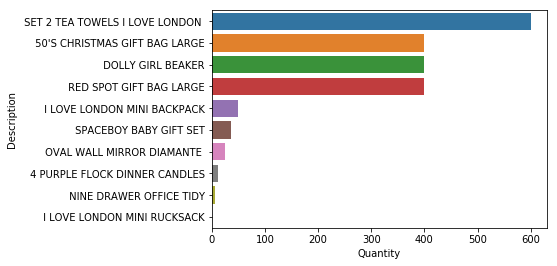

In [194]:
plt.figure()
sns.barplot(x="Quantity",y="Description",data=dfGroupSort)